This is a tensorflow starter notebook. Have fun. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import os
import PIL
import pathlib

In [2]:
train_dir = '../input/herbarium-2022-fgvc9/train_images/'
test_dir = '../input/herbarium-2022-fgvc9/test_images/'
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)
train_dir

PosixPath('../input/herbarium-2022-fgvc9/train_images')

In [3]:
import json
train_md = json.load(open('../input/herbarium-2022-fgvc9/train_metadata.json','r'))
test_md =  json.load(open('../input/herbarium-2022-fgvc9/test_metadata.json','r'))

In [4]:
folder000 = list(train_dir.glob('000/*/*'))
folder000

[PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__062.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__099.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__050.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__073.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__094.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__022.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__069.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__007.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__085.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__086.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__001.jpg'),
 PosixPath('../input/herbarium-2022-fgvc9/train_images/000/47/00047__095.jpg'),
 PosixPath('../input/herbarium-2022-fgvc

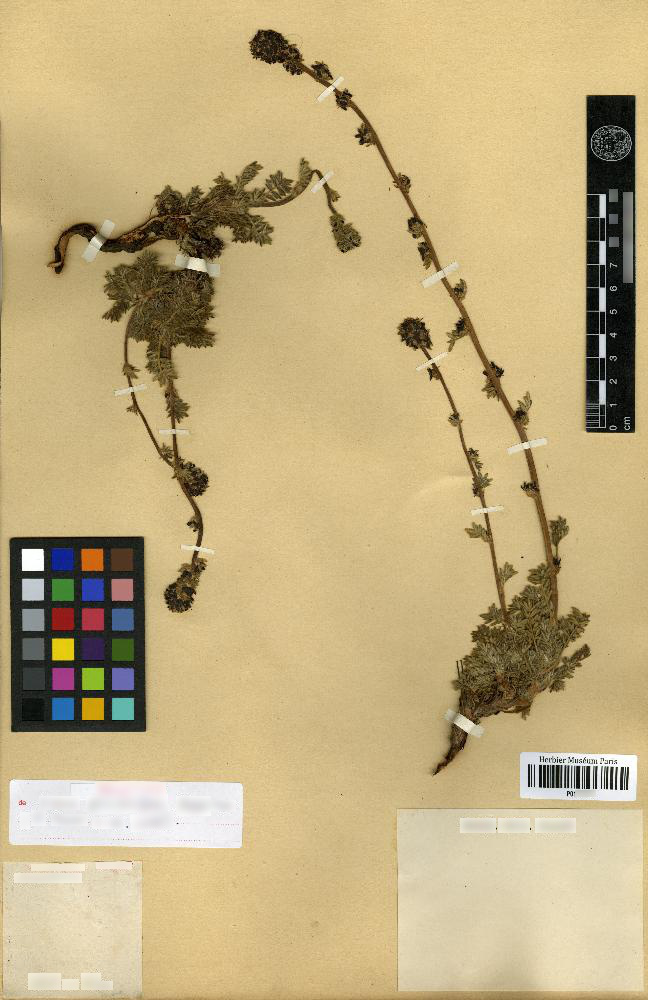

In [5]:
from PIL import Image
Image.open(folder000[0])

In [6]:
train_md.keys()

dict_keys(['annotations', 'images', 'categories', 'genera', 'institutions', 'distances', 'license'])

In [7]:
sm_sub = pd.read_csv('../input/herbarium-2022-fgvc9/sample_submission.csv',index_col=0)

In [8]:
sm_sub

,Predicted
Id,
0,42
1,42
2,42
3,42
4,42
...,...
223645,42
223646,42
223647,42


## Train Metadata

In [9]:
train_md.keys()

dict_keys(['annotations', 'images', 'categories', 'genera', 'institutions', 'distances', 'license'])

### Annotations

839772 annotations
all annots have ['genus_id', 'institution_id', 'category_id', 'image_id'] keys
This image has {'genus_id': 1, 'institution_id': 0, 'category_id': 0, 'image_id': '00000__001'} attributes


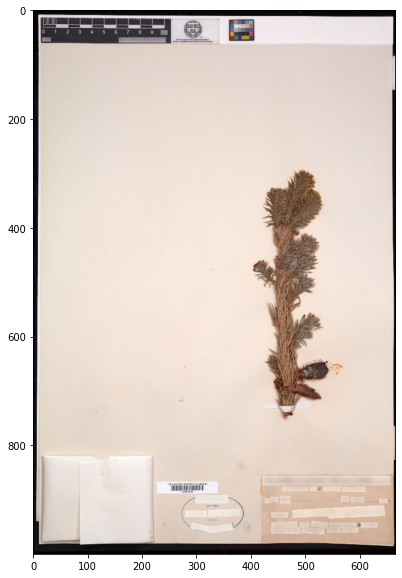

In [10]:
annots = train_md['annotations']
print(len(annots),'annotations')
if all(annot.keys() == {'genus_id', 'institution_id', 'category_id', 'image_id'} 
       for annot in annots):
    print("all annots have ['genus_id', 'institution_id', 'category_id', 'image_id'] keys")
def img_from_annot(annot):
    subf0 = annot['image_id'][:3]
    subf1 = annot['image_id'][3:5]
#     print(subf0, subf1)
    filename = annot['image_id'] + '.jpg'
    return Image.open(train_dir/subf0/subf1/filename)
img = img_from_annot(annots[0])
print(f'This image has {annots[0]} attributes')
plt.figure(figsize=(10,10))
plt.imshow(img)


### Images

In [11]:
imgs = train_md['images']
print(len(imgs), 'images')
imgs[:3]

839772 images


[{'image_id': '00000__001',
  'file_name': '000/00/00000__001.jpg',
  'license': 0},
 {'image_id': '00000__002',
  'file_name': '000/00/00000__002.jpg',
  'license': 0},
 {'image_id': '00000__003',
  'file_name': '000/00/00000__003.jpg',
  'license': 0}]

### Categories

In [12]:
cats = train_md['categories']
cats

[{'category_id': 0,
  'scientificName': 'Abies amabilis (Douglas ex Loudon) J.Forbes',
  'family': 'Pinaceae',
  'genus': 'Abies',
  'species': 'amabilis',
  'authors': '(Douglas ex Loudon) J.Forbes'},
 {'category_id': 1,
  'scientificName': 'Abies balsamea (L.) Mill.',
  'family': 'Pinaceae',
  'genus': 'Abies',
  'species': 'balsamea',
  'authors': '(L.) Mill.'},
 {'category_id': 2,
  'scientificName': 'Abies bracteata (D.Don) Poit.',
  'family': 'Pinaceae',
  'genus': 'Abies',
  'species': 'bracteata',
  'authors': '(D.Don) Poit.'},
 {'category_id': 3,
  'scientificName': 'Abies concolor (Gordon & Glend.) Lindl. ex Hildebr.',
  'family': 'Pinaceae',
  'genus': 'Abies',
  'species': 'concolor',
  'authors': '(Gordon & Glend.) Lindl. ex Hildebr.'},
 {'category_id': 4,
  'scientificName': 'Abies fraseri (Pursh) Poir.',
  'family': 'Pinaceae',
  'genus': 'Abies',
  'species': 'fraseri',
  'authors': '(Pursh) Poir.'},
 {'category_id': 5,
  'scientificName': 'Abies grandis (Douglas ex D.D